In [1]:
import sys
sys.path.append('..')

from sklearn.datasets import make_regression

import numpy as np
from src import grad_desc_algos as gda

import timeit

import matplotlib.pyplot as plt
from matplotlib import ticker, cm
%matplotlib inline

import matplotlib
font = {'family' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)
%time

Wall time: 0 ns


## Import dataset

In [3]:
features, target, coef = make_regression(n_samples=10000,
                                         n_features=2,
                                         n_informative=2,
                                         n_targets=1,
                                         noise=10.0,
                                         coef = True,
                                         random_state=1)

## Batch Gradient Descent

C:\Users\rhall\AppData\Local\Continuum\anaconda3\envs\graddesc\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


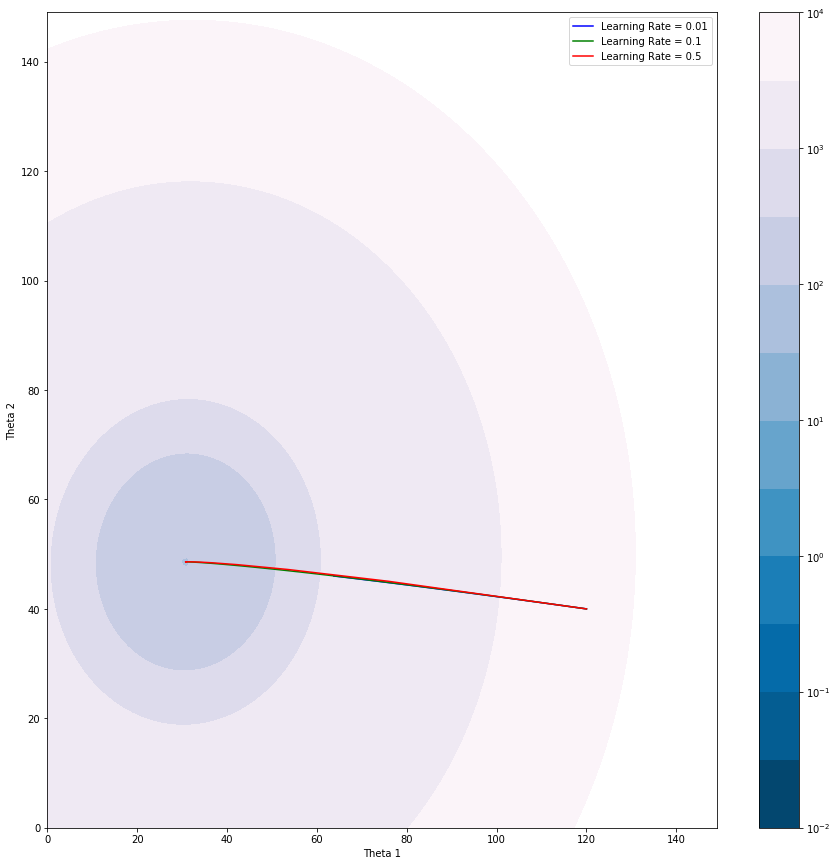

Final thetas: [30.81906981 48.58832618]
Actual Coefficents: [30.51944327 48.38204155]


In [4]:
x = np.arange(0, 150, 1)
y = np.arange(0, 150, 1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.average((np.dot(features, np.array([xx, yy])) - target) ** 2)
levels = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000]

fig, ax = plt.subplots(figsize=(15, 15))
cs = ax.contourf(x,y,z, levels, locator=ticker.LogLocator(), cmap=cm.PuBu_r)

epochs = 100

learing = [0.01, 0.1, 0.5]
colors = ['b', 'g', 'r']
random_start = [np.array([120, 40.]) for i in range(3)]

for lr, c, rs in zip(learing, colors,random_start):
    theta = rs
    #thetas, MSE = batch_gradient_descent(features, target, theta, lr, epochs)
    thetas, MSE = gda.batch_gradient_descent(features, target, theta, lr, epochs)
    ax.plot(thetas[:,0],thetas[:,1], c, label='Learning Rate = {}'.format(lr))
    ax.legend()
    
cbar = fig.colorbar(cs)
plt.xlabel('Theta 1')
plt.ylabel('Theta 2')
plt.show()
print("Final thetas: {}".format(thetas[-1]))
print("Actual Coefficents: {}".format(coef))

## Stochastic Gradient Descent

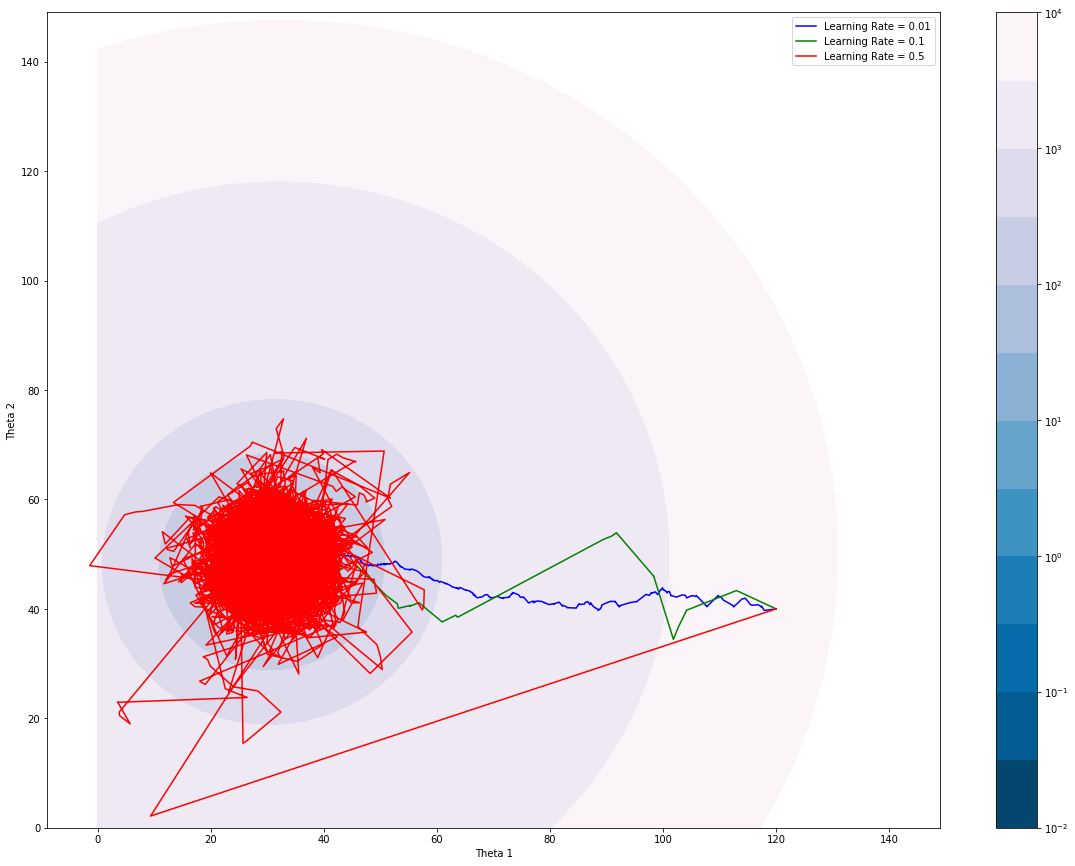

Final thetas: [33.23996343 47.5464549 ]
Actual Coefficents: [30.51944327 48.38204155]


In [5]:
x = np.arange(0, 150, 1)
y = np.arange(0, 150, 1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.average((np.dot(features, np.array([xx, yy])) - target) ** 2)
levels = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000]

fig, ax = plt.subplots(figsize=(20, 15))
cs = ax.contourf(x,y,z, levels, locator=ticker.LogLocator(), cmap=cm.PuBu_r)


learing = [0.01, 0.1, 0.5]
colors = ['b', 'g', 'r']
random_start = [np.array([120, 40.]) for i in range(3)]
epochs = 5

for lr, c, rs in zip(learing, colors,random_start):
    theta = rs
    thetas, MSE = gda.stochastic_gradient_descent(features, target, theta, lr, epochs)
    #thetas, MSE = stochastic_gradient_descent(features, target, theta, lr, epochs)
    ax.plot(thetas[:,0],thetas[:,1], c, label='Learning Rate = {}'.format(lr))
    ax.legend()
    
cbar = fig.colorbar(cs)
plt.xlabel('Theta 1')
plt.ylabel('Theta 2')
plt.show()
print("Final thetas: {}".format(thetas[-1]))
print("Actual Coefficents: {}".format(coef))

## Comparison of Gradient Descent implementations. 


| Algorithim | Batch Size  |
|-----|---|
| stochastic gradient descent | 1  | 
| mini-batch gradient descent | 32  |
| batch gradient descent | 10,000  |

ValueError: too many values to unpack (expected 2)

Final thetas for batch size of 1: [33.23996343 47.5464549 ]


ValueError: too many values to unpack (expected 2)

Final thetas for batch size of 32: [33.23996343 47.5464549 ]


ValueError: too many values to unpack (expected 2)

Final thetas for batch size of 10000: [33.23996343 47.5464549 ]
Actual Coefficents: [30.51944327 48.38204155]


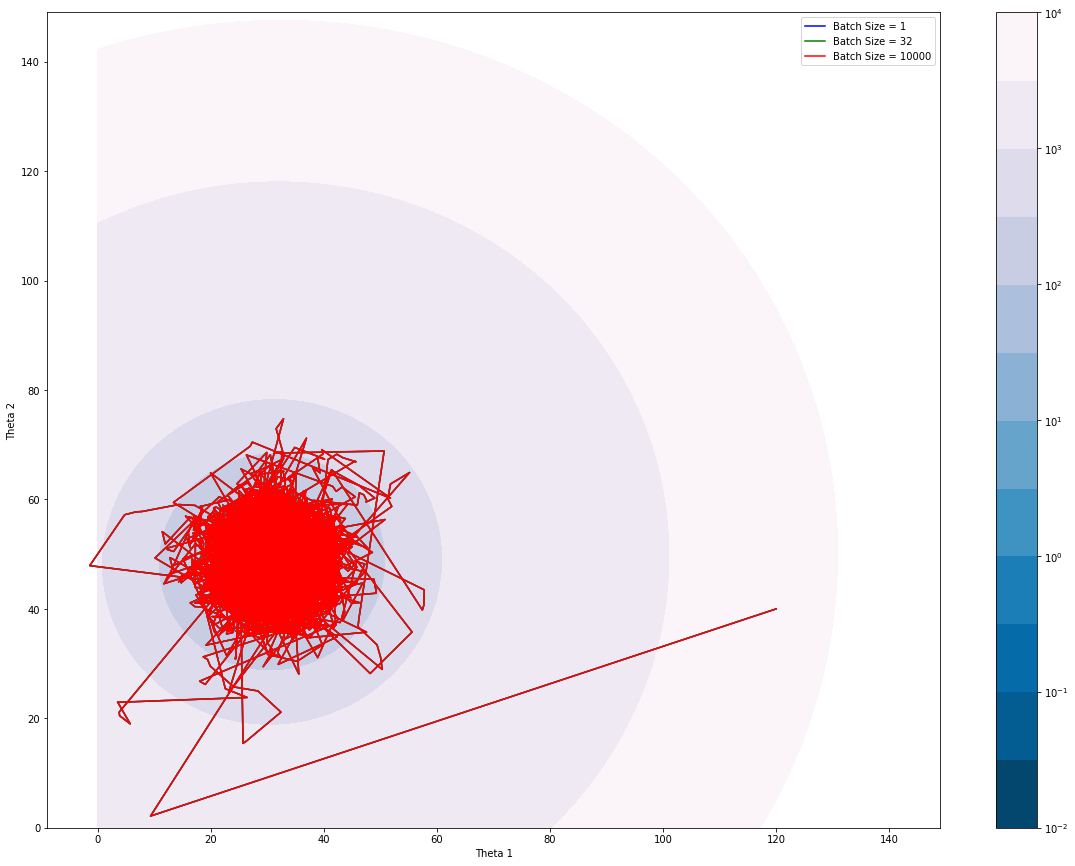

In [6]:
x = np.arange(0, 150, 1)
y = np.arange(0, 150, 1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.average((np.dot(features, np.array([xx, yy])) - target) ** 2)
levels = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000]

fig, ax = plt.subplots(figsize=(20, 15))
cs = ax.contourf(x,y,z, levels, locator=ticker.LogLocator(), cmap=cm.PuBu_r)


learning = 0.1 #[0.01, 0.1, 0.5]
colors = ['b', 'g', 'r']
random_start = [np.array([120, 40.]) for i in range(3)]
epochs = 10
batch_size = [1, 32, 10000]
count = 0

for c, rs, bs in zip(colors, random_start, batch_size):
    theta = rs
    %time thetas, MSE = gda.minibatch_gradient_descent(features, target, theta, learning, epochs, bs)
    #thetas, MSE = stochastic_gradient_descent(features, target, theta, lr, epochs)
    ax.plot(thetas[:,0],thetas[:,1], c, label='Batch Size = {}'.format(bs))
    ax.legend()
    print("Final thetas for batch size of {}: {}".format(bs, thetas[-1]))
    count += 1
    if count == len(batch_size):
        print("Actual Coefficents: {}".format(coef))
    
cbar = fig.colorbar(cs)
plt.xlabel('Theta 1')
plt.ylabel('Theta 2')
plt.show()

## Add Momentum

0
Final thetas for moment size of 0: [31.79364452 50.01875126]
Final count for moment size of 0: 10
Final MSE: [[10.          2.82234596]]
0.75
Final thetas for moment size of 0.75: [33.49650345 -1.63254113]
Final count for moment size of 0.75: 1
Final MSE: [[8.00000000e+00 8.92065676e-04]]
0.9
Final thetas for moment size of 0.9: [31.92993699 29.71258533]
Final count for moment size of 0.9: 1
Final MSE: [[41.          0.75135449]]
Actual Coefficents: [30.51944327 48.38204155]


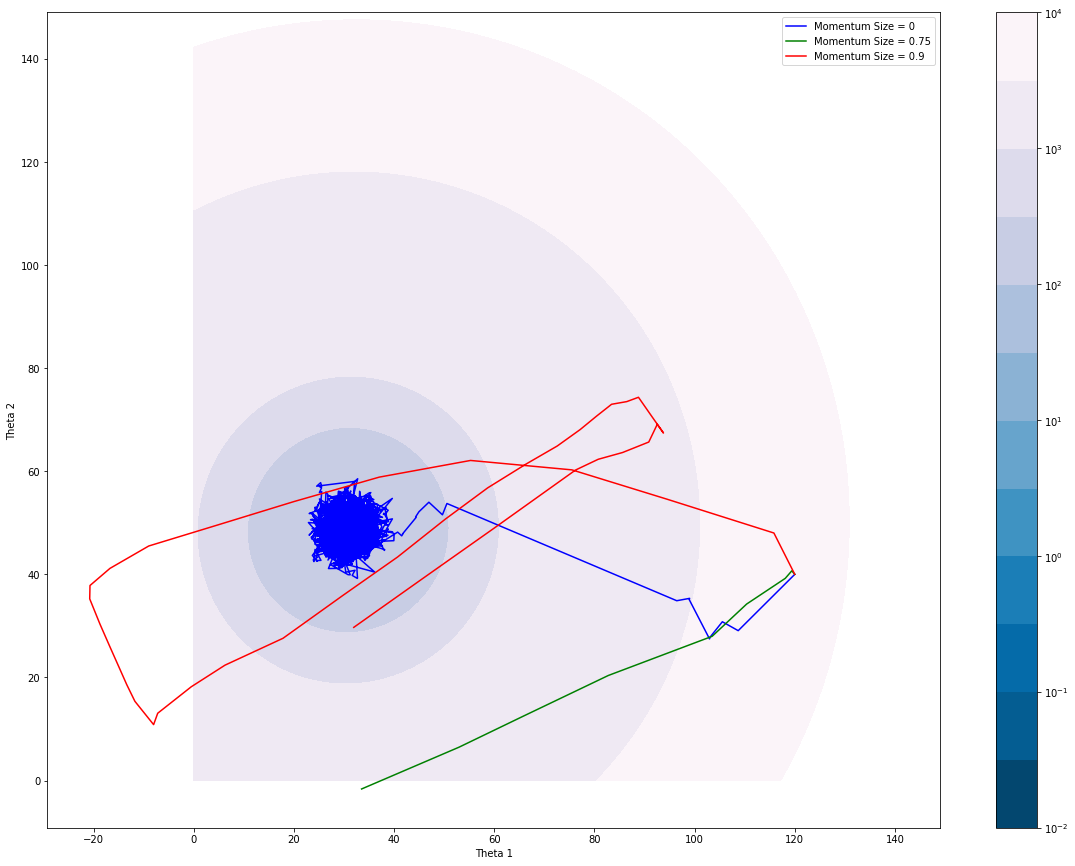

In [12]:
x = np.arange(0, 150, 1)
y = np.arange(0, 150, 1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.average((np.dot(features, np.array([xx, yy])) - target) ** 2)
levels = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000]

fig, ax = plt.subplots(figsize=(20, 15))
cs = ax.contourf(x,y,z, levels, locator=ticker.LogLocator(), cmap=cm.PuBu_r)


learning = 0.1 #[0.01, 0.1, 0.5]
colors = ['b', 'g', 'r']
random_start = [np.array([120, 40.]) for i in range(3)]
epochs = 10
momentum = [0, 0.75, 0.9]
count = 0

for c, rs, moment in zip(colors, random_start, momentum):
    theta = rs
    print(moment)
    thetas, MSE, num_epochs = gda.momentum_gd(features, target, theta, learning, epochs, momentum = moment)
    #thetas, MSE = stochastic_gradient_descent(features, target, theta, lr, epochs)
    ax.plot(thetas[:,0],thetas[:,1], c, label='Momentum Size = {}'.format(moment))
    ax.legend()
    print("Final thetas for moment size of {}: {}".format(moment, thetas[-1]))
    print("Final count for moment size of {}: {}".format(moment,  num_epochs))
    print("Final MSE: {}".format(MSE[-1:]))
    count += 1
    if count == len(momentum):
        print("Actual Coefficents: {}".format(coef))
    
cbar = fig.colorbar(cs)
plt.xlabel('Theta 1')
plt.ylabel('Theta 2')
plt.show()